In [1]:
import numpy as np 
import pandas as pd 

train = pd.read_csv('titanic/train.csv')
test  = pd.read_csv('titanic/test.csv')
sub   = pd.read_csv('titanic/gender_submission.csv')

In [3]:
from pycaret.classification import *

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
setup(data = train, 
    target = 'Survived',
    numeric_imputation = 'mean',
    categorical_features = ['Sex','Embarked'], 
    ignore_features = ['Name','Ticket','Cabin'])

,Description,Value
0,Session id,412
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 12)"
4,Transformed data shape,"(891, 11)"
5,Transformed train set shape,"(623, 11)"
6,Transformed test set shape,"(268, 11)"
7,Ignore features,3
8,Ordinal features,1
9,Numeric features,6


In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8202,0.8408,0.7281,0.7913,0.7573,0.6149,0.6173,0.0880
rf,Random Forest Classifier,0.8154,0.8570,0.7197,0.7832,0.7490,0.6036,0.6059,0.0940
lightgbm,Light Gradient Boosting Machine,0.8041,0.8391,0.6861,0.7778,0.7282,0.5761,0.5796,0.0380
lr,Logistic Regression,0.7997,0.8409,0.7029,0.7642,0.7269,0.5699,0.5763,0.2400
gbc,Gradient Boosting Classifier,0.7996,0.8558,0.6399,0.8012,0.7071,0.5585,0.5700,0.0640
ada,Ada Boost Classifier,0.7980,0.8230,0.7190,0.7505,0.7289,0.5687,0.5741,0.0550
nb,Naive Bayes,0.7931,0.8132,0.7074,0.7473,0.7209,0.5578,0.5636,0.0300
ridge,Ridge Classifier,0.7884,0.0000,0.6777,0.7498,0.7072,0.5431,0.5490,0.0230
lda,Linear Discriminant Analysis,0.7884,0.8407,0.6777,0.7498,0.7072,0.5431,0.5490,0.0290
dt,Decision Tree Classifier,0.7704,0.7594,0.7116,0.6978,0.7024,0.5159,0.5183,0.0280


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=412, verbose=0, warm_start=False)

# Выбор моделей

Выбираем модели с максимальным значением AUC:
- Random Forest Classifier
- Gradient Boosting Classifier
- Logistic Regression

In [16]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8125,0.5833,0.7368,0.6512,0.4741,0.4816
1,0.8254,0.9097,0.7917,0.7600,0.7755,0.6328,0.6331
2,0.8413,0.8381,0.7500,0.8182,0.7826,0.6580,0.6595
3,0.8548,0.8735,0.7391,0.8500,0.7907,0.6804,0.6843
4,0.8548,0.8920,0.7917,0.8261,0.8085,0.6917,0.6921
5,0.8226,0.8525,0.7500,0.7826,0.7660,0.6232,0.6236
6,0.7097,0.7780,0.6250,0.6250,0.6250,0.3882,0.3882
7,0.7742,0.8536,0.6250,0.7500,0.6818,0.5090,0.5141
8,0.8548,0.8586,0.7917,0.8261,0.8085,0.6917,0.6921


In [19]:
tuned_rf = tune_model(rf, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7619,0.8141,0.6667,0.6957,0.6809,0.4911,0.4914
1,0.7778,0.8889,0.8750,0.6562,0.7500,0.5572,0.5760
2,0.7778,0.8002,0.7083,0.7083,0.7083,0.5288,0.5288
3,0.8548,0.8662,0.7391,0.8500,0.7907,0.6804,0.6843
4,0.8710,0.9057,0.8750,0.8077,0.8400,0.7322,0.7338
5,0.8226,0.8520,0.7500,0.7826,0.7660,0.6232,0.6236
6,0.7903,0.8333,0.6667,0.7619,0.7111,0.5477,0.5507
7,0.7742,0.8673,0.6667,0.7273,0.6957,0.5167,0.5179
8,0.8226,0.8553,0.7083,0.8095,0.7556,0.6173,0.6207


In [22]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.7714,0.5000,0.6667,0.5714,0.3636,0.3721
1,0.7937,0.8600,0.7500,0.7200,0.7347,0.5660,0.5663
2,0.7619,0.8291,0.5417,0.7647,0.6341,0.4652,0.4804
3,0.7742,0.8841,0.5652,0.7647,0.6500,0.4888,0.5010
4,0.8710,0.9068,0.7917,0.8636,0.8261,0.7238,0.7256
5,0.8387,0.8810,0.7083,0.8500,0.7727,0.6493,0.6558
6,0.7742,0.8487,0.5417,0.8125,0.6500,0.4930,0.5151
7,0.8387,0.8498,0.6250,0.9375,0.7500,0.6379,0.6664
8,0.8065,0.8098,0.7500,0.7500,0.7500,0.5921,0.5921


In [24]:
tuned_gbc = tune_model(gbc, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.7799,0.5417,0.8125,0.6500,0.4966,0.5185
1,0.7460,0.8793,0.7083,0.6538,0.6800,0.4700,0.4711
2,0.7778,0.7895,0.5417,0.8125,0.6500,0.4966,0.5185
3,0.8387,0.8774,0.5652,1.0000,0.7222,0.6206,0.6707
4,0.8548,0.9101,0.7917,0.8261,0.8085,0.6917,0.6921
5,0.8065,0.8531,0.5833,0.8750,0.7000,0.5654,0.5908
6,0.7903,0.8640,0.5417,0.8667,0.6667,0.5253,0.5562
7,0.8226,0.8311,0.5417,1.0000,0.7027,0.5916,0.6481
8,0.7903,0.8717,0.5417,0.8667,0.6667,0.5253,0.5562


In [28]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6984,0.7500,0.5417,0.6190,0.5778,0.3448,0.3467
1,0.7619,0.8536,0.7917,0.6552,0.7170,0.5146,0.5215
2,0.7143,0.7714,0.6250,0.6250,0.6250,0.3942,0.3942
3,0.8387,0.8562,0.6957,0.8421,0.7619,0.6416,0.6483
4,0.8710,0.9013,0.9167,0.7857,0.8462,0.7362,0.7427
5,0.8710,0.8498,0.8333,0.8333,0.8333,0.7281,0.7281
6,0.7903,0.8684,0.5833,0.8235,0.6829,0.5330,0.5507
7,0.8065,0.8487,0.6250,0.8333,0.7143,0.5724,0.5860
8,0.8226,0.8487,0.6667,0.8421,0.7442,0.6112,0.6209


In [29]:
tuned_lr = tune_model(lr, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7143,0.7532,0.6250,0.6250,0.6250,0.3942,0.3942
1,0.7460,0.8526,0.8333,0.6250,0.7143,0.4940,0.5106
2,0.6984,0.7714,0.7083,0.5862,0.6415,0.3852,0.3904
3,0.8387,0.8595,0.7391,0.8095,0.7727,0.6481,0.6497
4,0.8065,0.9035,0.9167,0.6875,0.7857,0.6157,0.6370
5,0.8387,0.8531,0.8333,0.7692,0.8000,0.6652,0.6667
6,0.7419,0.8662,0.6250,0.6818,0.6522,0.4477,0.4487
7,0.7581,0.8487,0.6667,0.6957,0.6809,0.4862,0.4865
8,0.7581,0.8607,0.6667,0.6957,0.6809,0.4862,0.4865


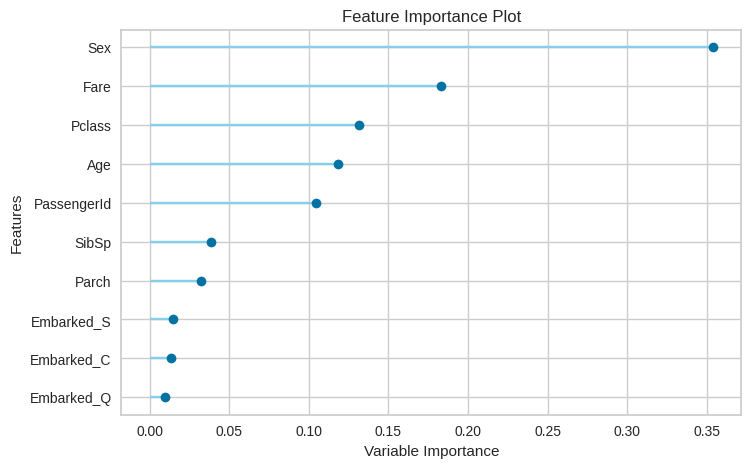

In [34]:
plot_model(estimator = tuned_rf, plot = 'feature')

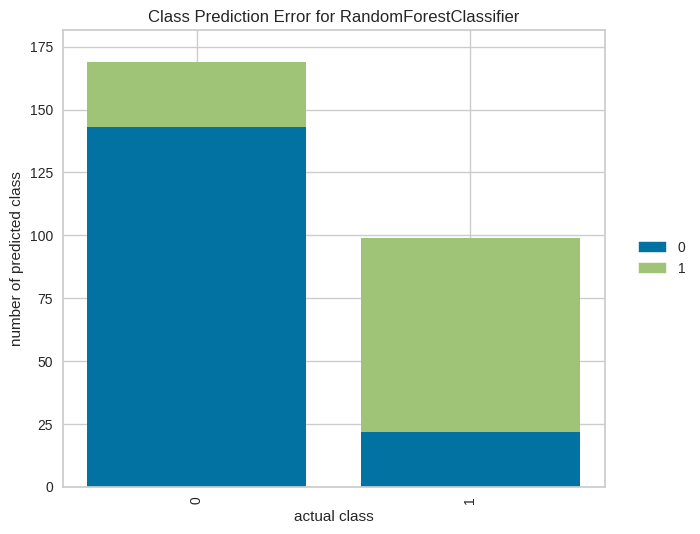

In [38]:
plot_model(estimator = tuned_rf, plot = 'error')

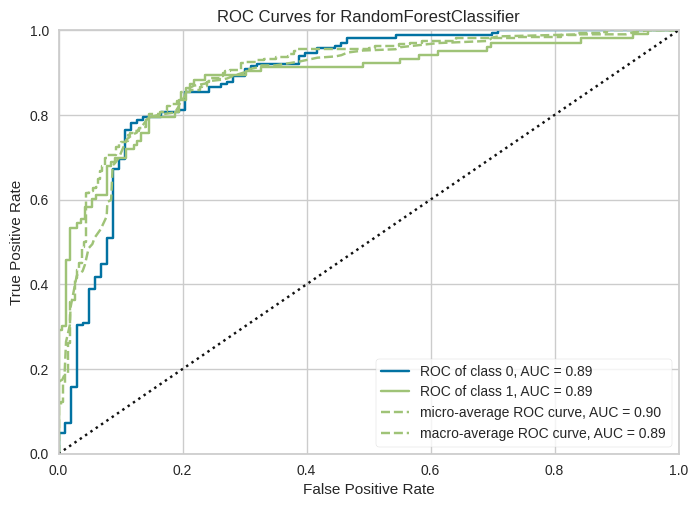

In [39]:
plot_model(estimator = tuned_rf, plot = 'auc')

In [40]:
predict_model(tuned_rf, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.829200,NaN,Q,0,0.8922
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.000000,NaN,S,0,0.5508
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.687500,NaN,Q,0,0.8262
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.662500,NaN,S,0,0.8160
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.287500,NaN,S,0,0.5363
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.050000,NaN,S,0,0.8496
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.900002,C105,C,1,0.9023
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.250000,NaN,S,0,0.9034
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.050000,NaN,S,0,0.8496


In [54]:
final_rf = finalize_model(tuned_rf)
print(final_rf)

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['PassengerId', 'Pclass', 'Age',
                                             'SibSp', 'Parch', 'Fare'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer'...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                            